<br>
<body>
    <p style="font-size:50px;text-align:center; color:#0070AD"><b>Data Challenge 2023</b></p>
    <p style="font-size:35px;text-align:center; color:#12ABDB">Welcoming Notebook</p>
    <p><center><img src="./src/figures/mines_invent_logo.png" style="width:80%;height:auto"></center></p>
</body>
<p style="font-size:30px;color:#0070AD">I. Challenge Background </p>
<br>

<p style="text-align: justify">Since the signing of the Kyoto Protocol in 1997, the reduction of greenhouse gases and in particular CO$_2$ emissions has become a major issue for all private and public actors. This is a key point if we hope to meet the objectives of the 2015 Paris Conference on Global Warming (COP21) to limit global warming between 1.5°C and 2°C.</p>

<p style="text-align: justify">In this context, many companies take into account ESG (Environmental Social Governance) criteria in their long-term investment strategy to quantify the impact of the company's actions on the environment and society.</p>

<br>
<p style="font-size:30px;color:#0070AD">II. Challenge goals </p>
<br>

<p style="text-align: justify">A client wishing to improve the consideration of ESG criteria for his company calls on you to estimate the carbon emissions of the vehicles used by his employees to come to their workplace. Aware that it is necessary to take into account the carbon impact of its employees, the client would like you to provide a model capable of quickly estimating the carbon emission of a vehicle based on images from a video surveillance of the company's parking lot.</p>

<p style="text-align: justify">The images available contain only one vehicle and for each one the coordinates of a box locating the vehicle in the image are given.</p>

<p style="text-align: justify">Your model has to return as outputs the four coordinates of the box locating the vehicle and the vehicle's CO$_2$ carbon emission. Indeed given an image i containing a car, the output of the global model is as follows :</p>
    
<br>
<center>
    $(\hat{x}^{min}_{i},\hat{x}^{max}_{i},\hat{y}^{min}_{i},\hat{y}^{max}_{i},\hat{e}^{carbone}_{i})$
</center>
<br>  

Where : 
- $\hat{x}^{min}_{i}, \hat{y}^{min}_{i}$ predicted coordinates of top left corner of the box locating the vehicle.
- $\hat{x}^{max}_{i}, \hat{y}^{max}_{i}$ predicted coordinates of the bottom right corner of the box locating the vehicle.
    
To assess the results, we compute the following metric :</p>

<br>
<center>
    $\frac{1}{n}\sum_{i=1}^{n}{0.7\cdot{(1-IoU_i)} + 0.3\cdot\frac{\lvert e_i^{carbone} - \hat{e_i}^{carbone} \rvert}{e_i^{carbone}}}$
</center>

<br>
Where : 

- $IoU_i$ is the Intersection Over Union for the ith image
- $e_i^{carbone}$ the real carbon emission of the ith vehicle
- $\hat{e_i}^{carbone}$ the predicted carbon emission of the ith vehicle 

<p style="text-align: justify">Given four predicted coordinates $(\hat{x}^{min}_{i},\hat{x}^{max}_{i},\hat{y}^{min}_{i},\hat{y}^{max}_{i})$ and the four true coordinates $(x^{min}_{i}, x^{max}_{i}, y^{min}_{i}, y^{max}_{i})$ of the box locating a vehicle in an image, here are the steps to calculate the $IoU$.</p>

<p style="text-align: justify">First we calculate the top left and the bottom right corner of the intersection :</p>
<br>
<center>
    $x_{inter_{1}} = max(x^{min}_{i},\hat{x}^{min}_{i})$
</center>
<center>
    $x_{inter_{2}} = min(x^{max}_{i},\hat{x}^{max}_{i})$
</center>
<center>
    $y_{inter_{1}} = max(y^{min}_{i},\hat{y}^{min}_{i})$
</center>
<center>
    $y_{inter_{2}} = min(y^{max}_{i},\hat{y}^{max}_{i})$
</center>

<p style="text-align: justify">Then we calculate the area of the intersection :</p>
<center>
    $width\_inter = x_{inter_{1}} - x_{inter_{2}}$
</center>
<center>
    $height\_inter = y_{inter_{1}} - y_{inter_{2}}$
</center>
<p style="text-align: justify"></p>
<center>
    $area\_inter = height\_inter\cdot{width\_inter}$
</center>

<p style="text-align: justify">Then we calculate the area of each box :</p>
<center>
    $width\_box1 = \hat{x}^{max}_{i}-\hat{x}^{min}_{i}$
</center>
<center>
    $height\_box1 = \hat{y}^{max}_{i}-\hat{y}^{min}_{i}$
</center>
<center>
    $width\_box2 = x^{max}_{i}-x^{min}_{i}$
</center>
<center>
    $height\_box2 = y^{max}_{i}-y^{min}_{i}$
</center>
<p style="text-align: justify"></p>
<center>
    $area\_box1 = width\_box1\cdot{height\_box1}$
</center>
<center>
    $area\_box2 = width\_box2\cdot{height\_box2}$
</center>

<p style="text-align: justify">Finally we calculate the $IoU$:</p>
<center>
    $area\_union = area\_box1 + area\_box2 - area\_inter$
</center>
<p style="text-align: justify"></p>
<center>
    $IoU = \frac{area\_inter}{area\_union}$
</center>

<br>
<p style="font-size:30px;color:#0070AD">III. Data Description </p>
<br>

<p style="text-align: justify">The client has provided you with different data to answer the problem :</p>

<ul>
  <li><b>2653</b> images contained in the folder train.</li>
    <li>a csv file named <b>_annotation.csv</b> in the folder train_annotation with several variables :</li>
    <ul>
        <li><b>im_name</b>: Image name.</li>
        <li><b>x_min</b>: The x coordinate of the top left corner of the box locating the vehicle.</li>
        <li><b>x_max</b>: The x coordinate of the bottom right corner of the box locating the vehicle.</li>
        <li><b>y_min</b>: The y coordinate of the top left corner of the box locating the vehicle.</li>
        <li><b>y_max</b>: The y coordinate of the bottom right corner of the box locating the vehicle.</li>
        <li><b>class</b>: What is the object inside the box.</li>
    </ul>
</ul>

<br>
<p style="font-size:30px;color:#0070AD">IV. Deliverables </p>
<br>

<p style="text-align: justify">As part of this challenge, the client expects two deliverables from you : 
    <ul>
        <li> A scientific procedure document presenting the proposed approach and the results obtained regarding the metric presented above. You will find a template here.</li>
        <li>A pitch presenting your solution, its advantages, its feasibility to your client.</li>
    </ul>
</p>

<br>
<p style="font-size:30px;color:#0070AD">V. Challenge evaluation </p>
<br>

<p style="text-align: justify">Based on your deliverables, you are evaluated on 5 final criteria by a jury :</p>
<ul>
    <li><b>Model Performance</b> : The solution delivers a satisfactory score for the metric used.</li>
    <li><b>Innovation</b> : Your ability to surprise the jury with the format of the pitch or the presentation of the scientific procedure document.</li>
    <li><b>Scientific approach</b> : Clarity, rigor, justification and relevance of your scientific approach. This criteria is evaluated on the scientific procedure document.</li>
    <li><b>Interdisciplinarity</b> : Your ability to collaborate, organize your team, the diversity of member schools and your ability to include different competences in a project. This criteria is evaluated on the scientific document procedure and the final pitch.</li>
    <li><b>Best Business opportunity</b> : Your ability to present your solution well, whether it is on the strategy of valorization, how it fits in an ecological approach, the gestures during the presentation and your capacity of persuasion. This criteria is evaluated on the final pitch</li>
</ul>    
<br>
<p style="font-size:30px;color:#0070AD">VI. Benchmark</p>
<br>

<p style="text-align: justify"> A first naive method to predict the different bounded box is to estimate it using the average of each variable <b>x_min</b>, <b>y_min</b>, <b>x_max</b> and <b>y_max</b> measured for each bounded box, this will serve as a benchmark for the bounded box predictions. Then, we simply randomly assign the CO2 consumption of car models for each image.</p>

<p style="text-align: justify"> The proposed solution does not constitute a solution to be adopted to solve the challenge. It is presented to show you an example of a submission that meets the requirements.</p>

<p style="font-size:20px;color:#12ABDB;text-indent:2em">A. Libraries import</p>

In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from shapely.geometry import Polygon
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img

<p style="font-size:20px;color:#12ABDB;text-indent:2em">B. Loading images</p>

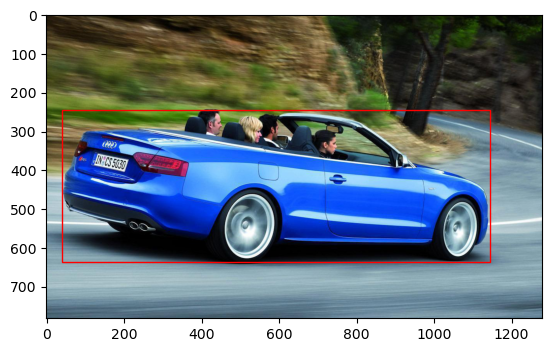

In [ ]:
path_annotrain = "../datasets_train/train_annotation/_annotation.csv"
train_annotation = pd.read_csv(path_annotrain, index_col=0)
bbox_train_full = train_annotation.loc[
    :, ["im_name", "x_min", "y_min", "x_max", "y_max"]
]
im_test = bbox_train_full.iloc[0, 0]
x1, y1, x2, y2 = bbox_train_full.loc[bbox_train_full["im_name"] == im_test].iloc[0, 1:]


def load_plot(im_name, x1, y1, x2, y2):
    """
    Load an image, display it, and draw a rectangle on it.

    Args:
        im_name (str): The name of the image file to load.
        x1 (int): The x-coordinate of the top-left corner of the rectangle.
        y1 (int): The y-coordinate of the top-left corner of the rectangle.
        x2 (int): The x-coordinate of the bottom-right corner of the rectangle.
        y2 (int): The y-coordinate of the bottom-right corner of the rectangle.

    Returns:
        Nothing.
    """
    im = np.asanyarray(Image.open(f"../datasets_train/train/{im_name}"))

    # Display the image
    plt.imshow(im)

    # Get the current reference
    ax = plt.gca()

    # Create a Rectangle patch
    rect = patches.Rectangle(
        (x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor="r", facecolor="none"
    )

    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.show()


load_plot(im_test, x1, y1, x2, y2)

<p style="font-size:20px;color:#12ABDB;text-indent:2em">C. Splitting the Data into Train & Eval Set</p>

In [3]:
# The split is 80% - 20% between Train and Eval (test_size=0.2)
bbox_train, bbox_eval = train_test_split(
    bbox_train_full, test_size=0.2, random_state=1234
)

<p style="font-size:20px;color:#12ABDB;text-indent:2em">D. Data Preprocessing</p>

In [4]:
def normalize_images_and_boxes(bbox_data, target_size, image_directory):
    """
    Normalize the size of images and bounding boxes.

    Args:
    bbox_data (pandas.DataFrame): A DataFrame containing information about images and bounding boxes. It should have the following columns:
        - image_name: Name of the image file.
        - x1: X-coordinate of the top-left corner of the bounding box.
        - y1: Y-coordinate of the top-left corner of the bounding box.
        - x2: X-coordinate of the bottom-right corner of the bounding box.
        - y2: Y-coordinate of the bottom-right corner of the bounding box.
    target_size (tuple): A tuple (width, height) specifying the desired size to which images should be resized and normalized.
    image_directory (str): The directory path where the image files are located.

    Returns:
    numpy.ndarray: A numpy array containing the preprocessed images.

    numpy.ndarray: A numpy array containing the target labels, i.e., the scaled bounding boxes represented as [x1_scaled, y1_scaled, x2_scaled, y2_scaled].
    """

    images = []  # List to store the preprocessed images
    labels = []  # List to store the target labels (scaled bounding boxes)

    for index, row in bbox_data.iterrows():
        image_name, x1, y1, x2, y2 = row

        # Load and normalize the image
        image = load_img(f"{image_directory}/{image_name}", target_size=target_size)
        image = img_to_array(image) / 255.0
        images.append(image)

        # Calculate scaling factors for bounding box coordinates
        original_width, original_height = load_img(
            f"{image_directory}/{image_name}"
        ).size
        scale_x = target_size[0] / original_width
        scale_y = target_size[1] / original_height

        # Resize and scale bounding box coordinates
        x1_scaled = x1 * scale_x
        y1_scaled = y1 * scale_y
        x2_scaled = x2 * scale_x
        y2_scaled = y2 * scale_y

        label = [x1_scaled, y1_scaled, x2_scaled, y2_scaled]
        labels.append(label)

    return np.array(images), np.array(labels)


# Define other preprocessing functions here:
def other_preprocessing(data):
    # Write your code here
    return data


# Union all the preprocessing functions
def preprocess_data(data, preprocessing_functions):
    """
    Preprocesses the input data using a list of preprocessing functions.

    Args:
        data (Any): The input data to be preprocessed.
        preprocessing_functions (list): A list of functions to apply to the input data.

    Returns:
        Any: The preprocessed data after applying all specified preprocessing functions.
    """
    for func in preprocessing_functions:
        data = func(data)
    return data

<p style="font-size:20px;color:#12ABDB;text-indent:2em">E. Metric to be recommended to use</p>

In [5]:
def local_IoU(
    xmin_pred_i,
    xmax_pred_i,
    ymin_pred_i,
    ymax_pred_i,
    xmin_true_i,
    xmax_true_i,
    ymin_true_i,
    ymax_true_i,
):
    """This function calculates the IoU for the image i.

    Args:
        xmin_pred_i: Value of the prediction min x-axis.
        xmax_pred_i: Value of the prediction max x-axis.
        ymin_pred_i: Value of the prediction min y-axis.
        ymax_pred_i: Value of the prediction max y-axis.
        xmin_true_i: Value of the true min x-axis.
        xmax_true_i: Value of the true max x-axis.
        ymin_true_i: Value of the true min y-axis.
        ymax_true_i: Value of the true max y-axis.

    Returns:
        The return value is the intersection over union.

    """
    if (xmin_true_i, xmax_true_i, ymin_true_i, ymax_true_i) == (0, 0, 0, 0):
        if (xmin_pred_i, xmax_pred_i, ymin_pred_i, ymax_pred_i) == (0, 0, 0, 0):
            return 1

        else:
            return 0

    else:
        box_pred_i = [
            [xmin_pred_i, ymin_pred_i],
            [xmax_pred_i, ymin_pred_i],
            [xmax_pred_i, ymax_pred_i],
            [xmin_pred_i, ymax_pred_i],
        ]
        box_true_i = [
            [xmin_true_i, ymin_true_i],
            [xmax_true_i, ymin_true_i],
            [xmax_true_i, ymax_true_i],
            [xmin_true_i, ymax_true_i],
        ]
        poly_1 = Polygon(box_pred_i)
        poly_2 = Polygon(box_true_i)
        try:
            iou = poly_1.intersection(poly_2).area / poly_1.union(poly_2).area
            return iou
        except:
            return 0


def local_MAPE(e_true_i, e_pred_i):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) for the image i.

    Args:
    e_true_i (float): The true values representing the true gas emission.
    e_pred_i (float): The predicted values representing the predicted gas emission.

    Returns:
    float: MAPE score between 0 and 1.
    """
    if e_true_i != 0:
        return abs(e_true_i - e_pred_i) / e_true_i
    else:
        if e_pred_i == 0:
            return 1
        else:
            return 0


def metrics_global(array_local_IoU, array_local_MAPE):
    """
    Calculate a global metric based on local IoU and MAPE values.

    Args:
        array_local_IoU (numpy.ndarray): An array containing local IoU (Intersection over Union) values.
        array_local_MAPE (numpy.ndarray): An array containing local MAPE (Mean Absolute Percentage Error) values.

    Returns:
        float: The global metric computed as the mean of a weighted sum of IoU and MAPE values.
    """
    # Combine IoU and MAPE using a weighted sum
    metrics = np.mean(0.7 * (1 - array_local_IoU) + 0.3 * array_local_MAPE)

    return metrics

<p style="font-size:20px;color:#12ABDB;text-indent:2em">F. Applying a naive model</p>

<li> Implementation of the naive method and evaluation on an evaluation image</li>

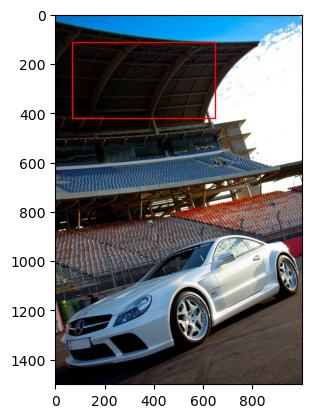

In [6]:
eval_pred = bbox_eval.copy()

# naive predictions for the bounded box
eval_pred["x_min"] = np.mean(bbox_train["x_min"])
eval_pred["x_max"] = np.mean(bbox_train["x_max"])
eval_pred["y_min"] = np.mean(bbox_train["y_min"])
eval_pred["y_max"] = np.mean(bbox_train["y_max"])

# test on the first image
im_pred_test = eval_pred.iloc[2, 0]
x1, y1, x2, y2 = eval_pred.loc[eval_pred["im_name"] == im_pred_test].iloc[0, 1:]

load_plot(im_pred_test, x1, y1, x2, y2)

<li>Random assignment of car models</li>

In [7]:
cars_path = "../carbon_footprint/models_consumption.csv"
car_models = pd.read_csv(cars_path, sep=";")

# randomly assign CO2 consumption of car models
np.random.seed(1234)
emission = car_models["Moyenne de CO2"].dropna()
eval_pred["e"] = eval_pred["x_min"].apply(lambda x: np.random.choice(emission, 1)[0])

<p style="font-size:20px;color:#12ABDB;text-indent:2em">G. Submission</p>

<li>Submission of the results taking care to respect the name of the columns and deleting the index on export. Please <b>refer the right submission path</b> of your group for the Data Challenge.</li>

In [ ]:
# ---> Voir comment on dépose les soumissions sur Google Colab (=> repos partagés avec les admins et chaque groupe)

# Submit the results (in CSV format)
eval_pred.to_csv(
    "../test_team.csv", index=False
)